# Quickstart: Modifying the scene

## Overview
In this tutorial, you will modify the scene from `0-render_cbox_diffuse.ipynb` so that the cubes in the Cornell Box are mirrors instead of diffuse surfaces. This will give you the necessary knowledge on how to make edits to your scene setup.

<div class="admonition important alert alert-block alert-warning">

This tutorial assumes that you've read `0-render_cbox_diffuse.ipynb`. Most of the setup/visualization code is the same. Here you get to see some cool specular reflections in the rendered video though :)

</div>

<div class="admonition important alert alert-block alert-success">

🚀 **You will learn how to:**

<ul>
  <li>
  
  Edit a scene (either editing the Python dictionary or the XML)</li>
  <li>
  
  Visualize the edited scene</li>
</ul>

</div>

In [1]:
# If you have compiled Mitsuba 3 yourself, you will need to specify the path
# to the compilation folder
# import sys
# sys.path.insert(0, '<mitsuba-path>/mitsuba3/build/python')
import mitsuba as mi
# To set a variant, you need to have set it in the mitsuba.conf file
# https://mitsuba.readthedocs.io/en/latest/src/key_topics/variants.html
mi.set_variant('llvm_ad_rgb')

import mitransient as mitr

print('Using mitsuba version:', mi.__version__)
print('Using mitransient version:', mitr.__version__)

Using mitsuba version: 3.6.4
Using mitransient version: 1.2.0


We use the short alias `mitr` for `mitransient` for improved code readibility.

### Editing the Cornell Box scene

As before, there are two ways to set up and modify the scene. Both ways accomplish the same goals:

1. `mi.load_dict(d)`: If you want to modify the scene, you can edit the Python dictionary `d` that you pass to this function.

In [2]:
d = mitr.cornell_box()

# change the back wall to a perfectly reflective mirror
# d['back']['bsdf'] = {
#     'type': 'conductor',
#     'material': 'none',
# }

# large box is transparent, made of glass
d['large-box']['bsdf'] = {
    'type': 'dielectric',
    'int_ior': 'acrylic glass',
    'ext_ior': 'air'
}

# small box is also made of glass
d['small-box']['bsdf'] = {
    'type': 'dielectric',
    'int_ior': 'acrylic glass',
    'ext_ior': 'air'
}

scene = mi.load_dict(d)

  2. `mi.load_file(f)`: We provide a `cbox_mirror.xml` file which varies a bit with respect to `cbox_diffuse.xml`. You can check it, but for this tutorial we'll use the dictionary above.

In [3]:
# Load XML file
# You can also use mi.load_dict and pass a Python dict object
# but it is probably much easier for your work to use XML files
# import os
# scene = mi.load_file(os.path.abspath('cornell-box/cbox_mirror.xml'))

### Render and visualization

This uses the same methods as in the previous notebook.

In [4]:
data_steady, data_transient = mi.render(scene, spp=10_000)
print(data_steady.shape, data_transient.shape)

(256, 256, 3) (256, 256, 300, 3)


<div class="admonition important alert alert-block alert-warning">
Note that this function will take longer to execute, as it's doing the rendering job (lazy evaluation)
</div>

In [5]:
# Plot the computed steady image
mi.util.convert_to_bitmap(data_steady)

Bitmap[
  pixel_format = rgb,
  component_format = uint8,
  size = [256, 256],
  srgb_gamma = 1,
  struct = Struct<3>[
    uint8 R; // @0, normalized, gamma, premultiplied alpha
    uint8 G; // @1, normalized, gamma, premultiplied alpha
    uint8 B; // @2, normalized, gamma, premultiplied alpha
  ],
  data = [ 192 KiB of image data ]
]

In [6]:
# Plot the computed transient image as a video
data_transient_tonemapped = mitr.vis.tonemap_transient(data_transient)

mitr.vis.show_video(
    data_transient_tonemapped,
    axis_video=2,
)

<div class="admonition important alert alert-block alert-success">

💡 These results are especially interesting. Note how the reflection on the back wall takes longer to arrive to the camera when it travels through the glass cubes. Light takes longer to travel through objects with a high index of refraction.

</div>

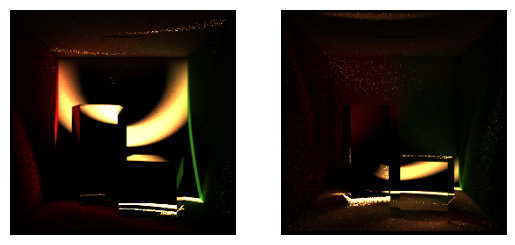

In [7]:
# Plot some frames of the computed transient image
import matplotlib.pyplot as plt

data_transient_tonemapped[data_transient_tonemapped > 1] = 1

plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(data_transient_tonemapped[:, :, 150])
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(data_transient_tonemapped[:, :, 190])
plt.show()